<div align='center'>

## Exploratory Data Analysis (EDA)

</div>


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#### Load Dataset


In [23]:
load_data = pd.read_csv("../Data/processed/processed_v0.0.1.csv", index_col=False)

In [24]:
df = load_data.copy()

In [25]:
df.drop_duplicates(inplace=True, ignore_index=True)

#### Inspect shape and info


In [26]:
df.shape

(200, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_studied       200 non-null    float64
 1   sleep_hours         200 non-null    float64
 2   attendance_percent  200 non-null    float64
 3   previous_scores     200 non-null    int64  
 4   exam_score          200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [28]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


#### Check data type


In [29]:
df.dtypes

hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object

#### Identify missing values


In [30]:
df.isna().sum()

hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

### **Outliers**


#### Method - 1

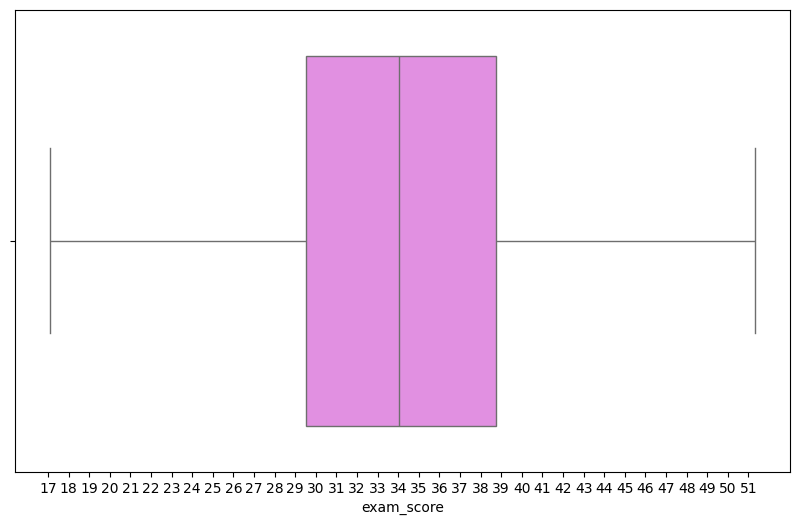

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="exam_score", color="violet", data=df)
plt.xticks(range(int(df["exam_score"].min()), int(df["exam_score"].max()) + 1, 1))
plt.show()

#### Method - 2

In [110]:
# df['exam_z_score'] = zscore(df['exam_score'])
# df.head()


#### Method - 3

In [139]:
q1 = df["exam_score"].quantile(0.25)
q3 = df["exam_score"].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

df["exam_z_score"] = ((df["exam_score"] < lower_bound) | (df["exam_score"] > upper_bound))


df[df['exam_z_score'] == False]

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,exam_z_score
0,8.0,8.8,72.1,45,30.2,False
1,1.3,8.6,60.7,55,25.0,False
2,4.0,8.2,73.7,86,35.8,False
3,3.5,4.8,95.1,66,34.0,False
4,9.1,6.4,89.8,71,40.3,False
...,...,...,...,...,...,...
195,10.5,5.4,94.0,87,42.7,False
196,7.1,6.1,85.1,92,40.4,False
197,1.6,6.9,63.8,76,28.2,False
198,12.0,7.3,50.5,58,42.0,False


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3
